In [4]:
import pandas as pd
%matplotlib inline
from collections import Counter
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import random
import re


# source: https://www.kaggle.com/datasnaek/youtube-new/data

In [5]:
trending = pd.DataFrame.from_csv('USvideos_1.csv')
trending_UK = pd.DataFrame.from_csv("GBvideos.csv")
trending_CA = pd.DataFrame.from_csv("CAvideos.csv")

categories = pd.DataFrame.from_csv("categories.csv",index_col=None)
trending= trending.merge(categories,on="category_id")
trending_UK = trending_UK.merge(categories,on="category_id")
trending_CA = trending_CA.merge(categories,on="category_id")

In [6]:
trending

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
5,17.14.11,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,"BuzzFeed|""buzzfeed celeb""|""Mark Ruffalo""|""Thor...",177707,6271,88,275,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs
6,17.14.11,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,2017-11-09T11:24:14.000Z,"Japan|""Japanese""|""yt:cc=on""|""idiot's""|""guide""|...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs
7,17.14.11,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,2017-11-09T07:00:01.000Z,"Full Frontal with Samantha Bee|""Full Frontal""|...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs
8,17.14.11,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,2017-11-10T00:24:29.000Z,"nicole guerriero|""arriba liqud lipstick""|""colo...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs
9,17.14.11,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,2017-11-09T23:27:18.000Z,"SuperCarlinBrothers|""disney""|""fox""|""disney pri...",188003,9091,135,2814,https://i.ytimg.com/vi/Eg_kW5fw6qU/default.jpg,False,False,False,"Special Thanks to these Patreons :: Abi Solk, ...",People & Blogs


### Correlaties

In [7]:
trending.corr()[(trending.corr() > 0.5) | (trending.corr() < -0.5)]

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,NaN,1.000000,0.797985,NaN,0.567724,NaN,NaN,NaN
likes,NaN,0.797985,1.000000,NaN,0.725882,NaN,NaN,NaN
dislikes,NaN,NaN,NaN,1.000000,0.810495,NaN,NaN,NaN
comment_count,NaN,0.567724,0.725882,0.810495,1.000000,NaN,NaN,NaN
comments_disabled,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ratings_disabled,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Hoe staan likes in verband met views? Waarom krijgen bepaalde trending videos percentueel gezien meer likes?

In [8]:
# Voeg ratios toe
trending['like_view_ratio'] = trending.likes / trending.views
trending['dislike_view_ratio'] = trending.dislikes / trending.views

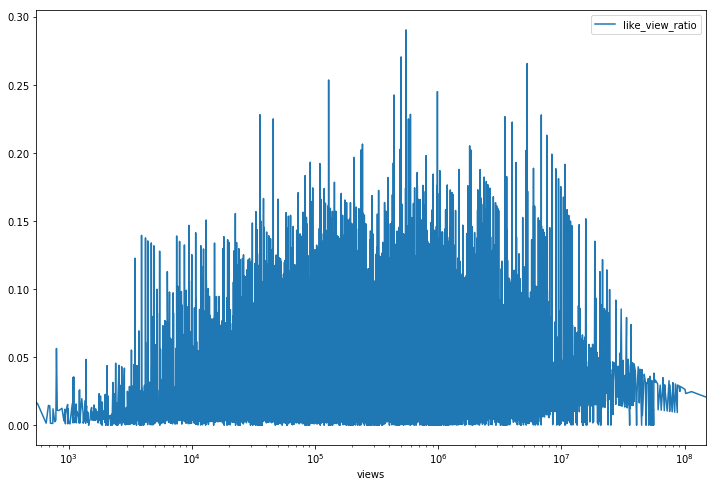

In [9]:
# Ratio likes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="like_view_ratio", figsize=(12,8), logx=True)

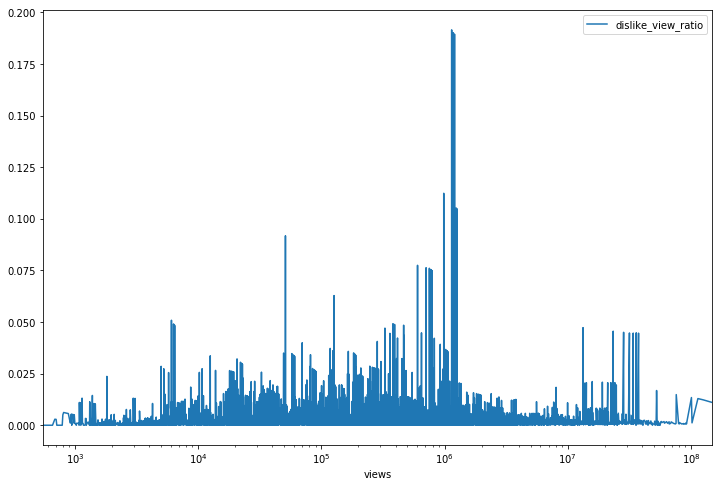

In [10]:
# Ratio dislikes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="dislike_view_ratio", figsize=(12,8), logx=True)

In [11]:
# Welke categorieën zijn sterk vertegenwoordigd bij de hoge ratio?
trending[trending.like_view_ratio > 0.15].category_name.value_counts()

# Het lijkt erop dat muziekvideo gevolgd door ... de meeste likes krijgen.

Music               83
People & Blogs      23
Entertainment       21
Comedy               7
Howto & Style        6
Film & Animation     3
Sports               3
Education            1
Name: category_name, dtype: int64

### Meest controversiele videos in trending? Hebben deze dan ook meer comments dan niet controversiele videos? Wat zijn de onderwerpen van deze videos?

In [12]:
trending["like_dislike_ratio"] = trending.likes / trending.dislikes
trending[trending.like_dislike_ratio < 1].sort_values(by="like_dislike_ratio", ascending=True)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_view_ratio,dislike_view_ratio,like_dislike_ratio
15645,17.22.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2447,0,3,1,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,Sports,0.000000,0.001226,0.000000
15632,17.21.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2197,0,2,0,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,Sports,0.000000,0.000910,0.000000
581,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People & Blogs,0.007964,0.191531,0.041583
603,17.20.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1179072,9368,224152,29063,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People & Blogs,0.007945,0.190109,0.041793
620,17.21.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1205682,9572,228426,29634,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People & Blogs,0.007939,0.189458,0.041904
14037,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004943,0.112372,0.043990
14093,17.18.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1263104,5930,132439,23543,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004695,0.104852,0.044775
14074,17.17.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1242998,5884,130836,23297,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004734,0.105258,0.044972
14056,17.16.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1192501,5707,126649,23426,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News & Politics,0.004786,0.106205,0.045062
1224,18.31.01,LuLaRoe Consultant Mocks Those With Special Needs,J S,22,2018-01-25T02:35:03.000Z,LuLaRoe Budenberger MLMs,212858,27,591,209,https://i.ytimg.com/vi/DQDj074iEuM/default.jpg,False,False,False,Apologyvideo found here: https://www.youtube.c...,People & Blogs,0.000127,0.002776,0.045685


In [13]:
contro = trending[trending.like_dislike_ratio < 1].title.values
for x in contro:
    for y in x.split():
        y.lower()

Counter([y.lower() for x in contro for y in x.split()])

Counter({'#1': 10,
         '#3': 1,
         '#littleones': 1,
         '#metoo': 16,
         '&': 17,
         "'fake'": 2,
         "'i": 7,
         "'monkey'": 3,
         "'n": 2,
         "'sh*thole": 1,
         "'transparent'": 5,
         '(c-span)': 14,
         '(d-ca)': 7,
         '(exclusive)': 9,
         '(full)': 6,
         '(official': 4,
         '*emotional*': 3,
         '-': 15,
         '/': 7,
         '02,': 1,
         '1': 7,
         '1-22-18': 5,
         '1/25/18': 5,
         '10': 5,
         '11,': 1,
         '11:': 6,
         '13,': 2,
         '17,': 7,
         '2017': 9,
         '2018': 45,
         '2018:': 10,
         '2020': 6,
         '23,': 2,
         '3,': 3,
         '33': 4,
         '5': 9,
         '7th': 7,
         'a': 27,
         'about': 20,
         'access': 6,
         'account': 2,
         'accused': 7,
         'accusers': 2,
         'accuses': 6,
         'act': 7,
         'ad': 1,
         'addresses': 13,
        

### Zijn er dagen met uitzonderlijk veel dislikes

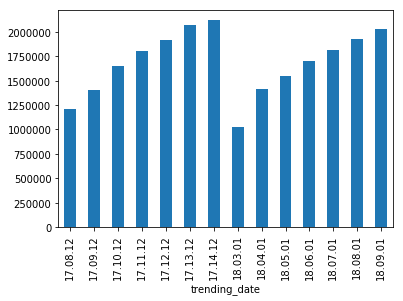

In [14]:
dislikesDay = trending.groupby("trending_date").dislikes.sum()
dislikesDay[dislikesDay>dislikesDay.std()+dislikesDay.mean()].plot(kind="bar")

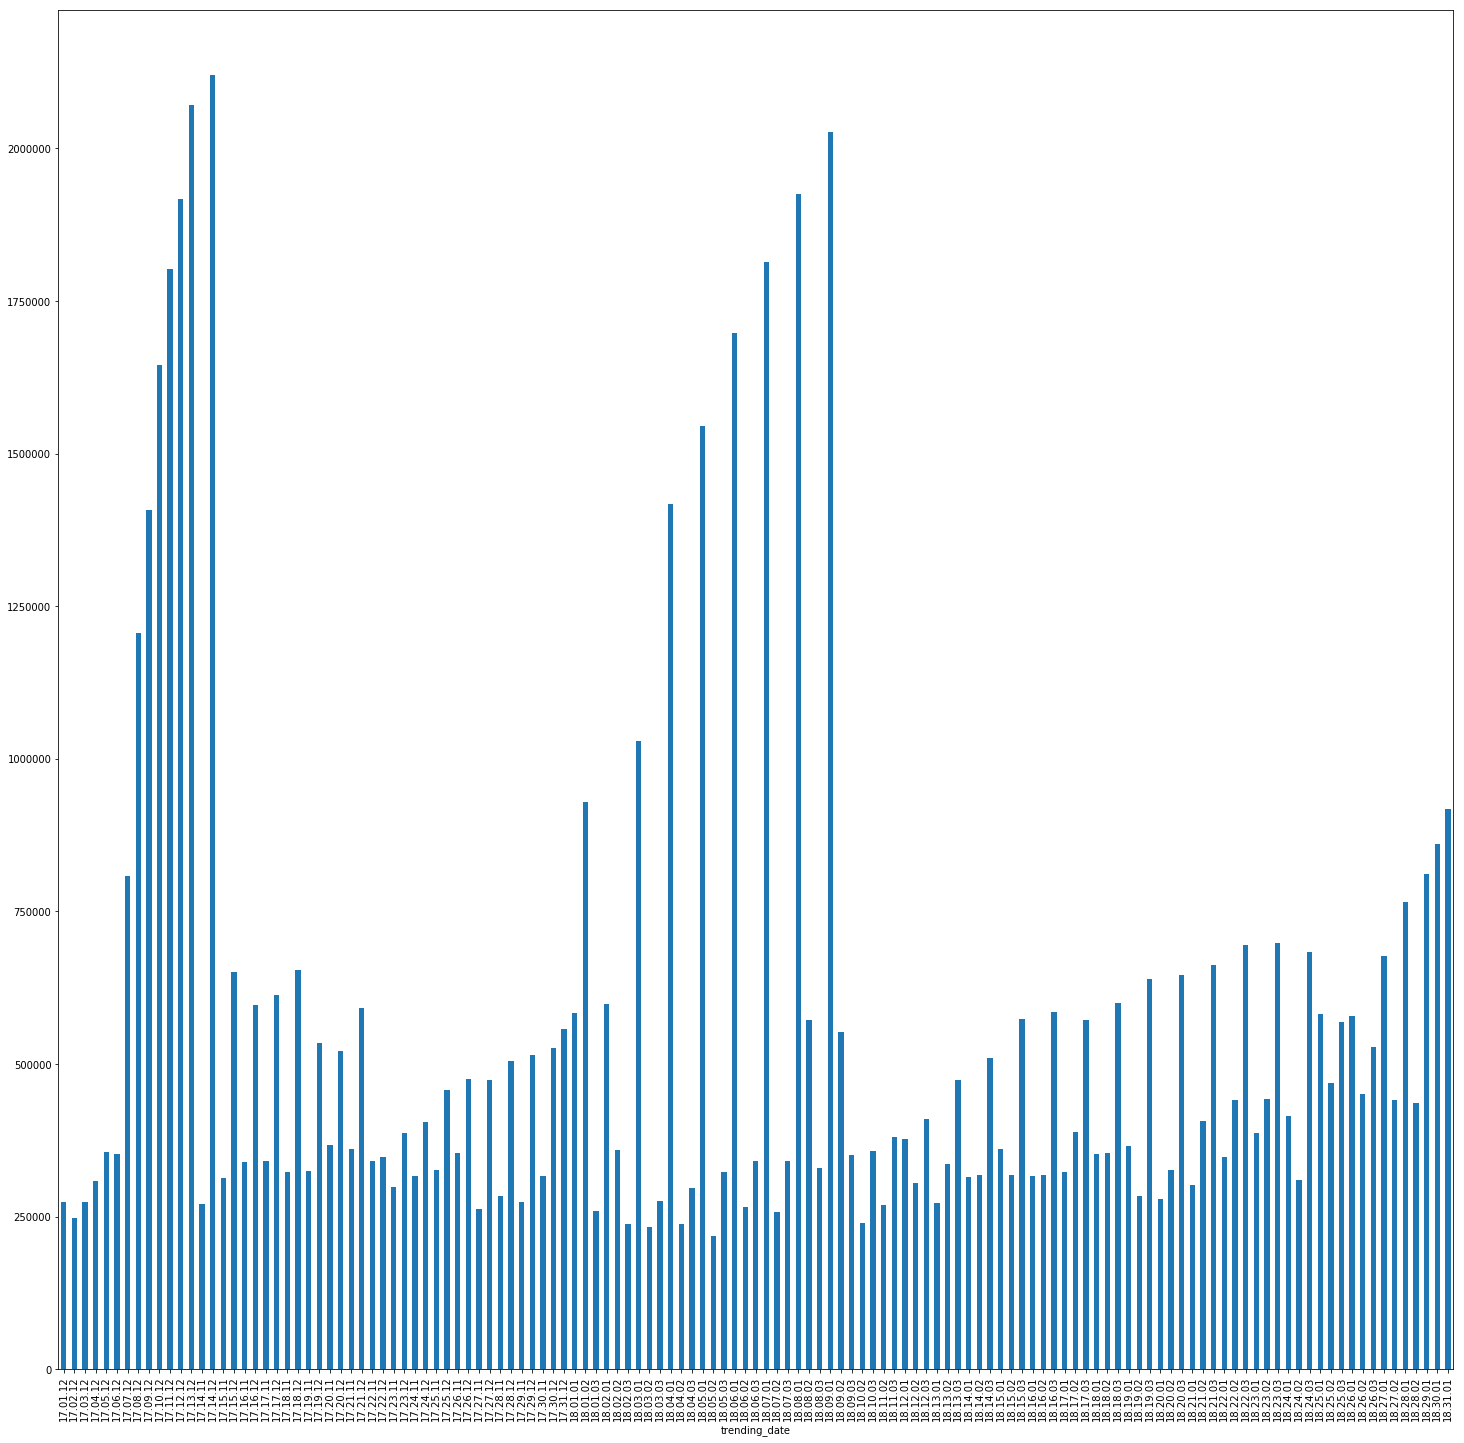

In [15]:
dislikesDay.plot(kind="bar",figsize=(25,25))

### Welke videos zijn in deze periode het meest controversieel (dislikes en likes dicht bij elkaar)

In [16]:
trending[trending.like_dislike_ratio < 1].sort_values(by="like_dislike_ratio", ascending=False).title


14365                       President Trump Signs Tax Bill
14352                       President Trump Signs Tax Bill
14110    Trump delivers remarks regarding his national ...
14341                       President Trump Signs Tax Bill
23481           Cooking With Your Mouth | Christmas Turkey
2186     President Bill Clinton On Dictators, Democracy...
14328                       President Trump Signs Tax Bill
14313                       President Trump Signs Tax Bill
16978    Matthew Santoro - FACTS (Official Music Video)...
14297                       President Trump Signs Tax Bill
10474          Selling My iPhone X To a Machine at Walmart
14279                       President Trump Signs Tax Bill
14664               Eagles players mock Vikings in blowout
4921     Golden Globes 2018: What to Expect as Celebs H...
23454           Cooking With Your Mouth | Christmas Turkey
16053          Top 10 Plays of the Night | January 3, 2018
16928    Matthew Santoro - FACTS (Official Music Video).

### Zijn vrolijke dagen terug te vinden in het aantal likes? Misschien volksfeesten?

In [17]:
# source official US holidays https://www.beleven.org/feesten/lijsten/landen.php?land=Verenigde+Staten in the period
happy_days=["17.23.11","17.25.12","18.1.1","18.15.1"]
holidayTrends=trending[trending.trending_date.isin(happy_days)]

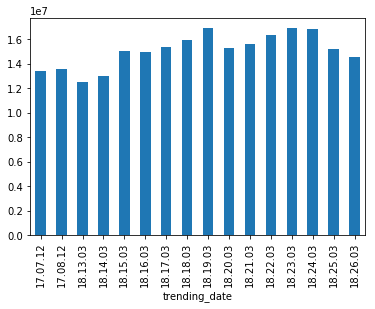

In [18]:
# more likes than usual
likesDay = trending.groupby("trending_date").likes.sum()
likesDay[likesDay>likesDay.std()+likesDay.mean()].plot(kind="bar")

In [19]:
# Find holiday dates in unusual liked days
likesDay[likesDay.index.isin(happy_days)]

trending_date
17.23.11    9357437
17.25.12    8512395
Name: likes, dtype: int64

### Zijn er meer views tijdens vrolijke dagen dan in normale dagen?

In [20]:
# if sum(video_views)/amount_of_videos > video_view.mean() then Yes
holidayTrends.views.sum()/holidayTrends.views.count()>trending.views.mean()

False

### Is er een publicatietijd die vaak voorkomt (verband tussen publicatietijd en views)

In [21]:
# we moeten tijden indelen in blokken van een uur dus 23:30 gaat in het blok van 00:00 en 04:45 in 05:00
times = [[int(y[0]),int(y[1])] for y in [x.split("T")[1][:-8].split(":") for x in trending.publish_time]]
timecodes = []
for hour, minutes in times:
    if minutes==0:
        timecodes.append(hour)
    else:
        if hour != 23:
            timecodes.append(hour+1)
        else:
            timecodes.append(0)
trending["timecode"]= pd.Series(timecodes,index=trending.index)


In [22]:
trending[["timecode","views"]].corr()


,timecode,views
timecode,1.000000,-0.027787
views,-0.027787,1.000000


### Welke categorieen hebben de hoogste aantal likes?

category = trending.groupby("category_name").likes
category.sum.sort_values(ascending=False)

In [23]:
publish_dates = []
for x in trending.publish_time:
    temp = x.split("T")[0].replace("-",".")
    publish_dates.append( temp[2:5]+str(int(temp[-2:])+1)+temp[-6:-3])
trending["publish_date"]=publish_dates
trending[trending.trending_date==publish_dates]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_view_ratio,dislike_view_ratio,like_dislike_ratio,timecode,publish_date
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.076869,0.003963,19.395482,18,17.14.11
33,17.16.11,Granulated Sugar From Honey,Cody'sLab Backup,22,2017-11-15T07:25:03.000Z,[none],52607,3835,32,351,...,False,False,False,I use a power juicer to separate the crystals ...,People & Blogs,0.072899,0.000608,119.843750,8,17.16.11
42,17.17.11,We Can All Do Better Than Roy Moore | November...,Full Frontal with Samantha Bee,22,2017-11-16T07:00:04.000Z,"Full Frontal with Samantha Bee|""Full Frontal""|...",397983,5666,1682,1306,...,False,False,False,"Hey Alabama, on December 12 you have a chance ...",People & Blogs,0.014237,0.004226,3.368609,7,17.17.11
45,17.17.11,Every Snack I'm Packing for the Victoria's Sec...,Klossy,22,2017-11-16T15:23:10.000Z,"victoria secret fashion show|""vs fashion show""...",76491,3849,95,217,...,False,False,False,This video isn't sponsored. These are all the ...,People & Blogs,0.050320,0.001242,40.515789,16,17.17.11
52,17.18.11,Why Are Taxes So Complicated? (The Musical?),vlogbrothers,22,2017-11-17T18:26:16.000Z,"taxes|""government""|""politics""|""education""|""lea...",81759,5896,166,864,...,False,False,False,In which Hank intended to just make a video ab...,People & Blogs,0.072114,0.002030,35.518072,19,17.18.11
55,17.18.11,Eminem speaks on working with Beyonce,Shade 45,22,2017-11-17T18:26:49.000Z,"Eminem|""Shade45""|""Beyonce""|""SiriusXM""|""Walk on...",26393,162,74,94,...,False,False,False,Eminem speaks on working with Beyoncé on his S...,People & Blogs,0.006138,0.002804,2.189189,19,17.18.11
74,17.20.11,I Dressed Like It Was 1977,Safiya Nygaard,22,2017-11-19T21:29:25.000Z,"i dressed like it was 1977|""1977 fashions""|""19...",1174413,76342,698,7224,...,False,False,False,I styled 3 outfits inspired by the popular fas...,People & Blogs,0.065004,0.000594,109.372493,22,17.20.11
75,17.20.11,American Influencer Awards 2017,AIA awards,22,2017-11-19T07:05:06.000Z,"American Influencer Awards|""AIA""|""2017""|""Novo ...",66888,1098,427,313,...,False,False,False,Join us LIVE from the Novo Theatre in Los Ange...,People & Blogs,0.016416,0.006384,2.571429,8,17.20.11
89,17.21.11,Wild Turkey Bourbon & Matthew McConaughey Give...,WildTurkeyBourbon,22,2017-11-20T14:04:16.000Z,[none],21194,413,14,69,...,False,False,False,"Just in time for Thanksgiving, Matthew McConau...",People & Blogs,0.019487,0.000661,29.500000,15,17.21.11
90,17.21.11,Last Workout Before the Victoria's Secret Fash...,Klossy,22,2017-11-20T10:23:00.000Z,"klossy|""karlie kloss""|""kloss""|""karlie""|""shangh...",129902,6801,53,323,...,False,False,False,Major shout out to Dara Hart for coming all th...,People & Blogs,0.052355,0.000408,128.320755,11,17.21.11


# bewaren

In [24]:
originalTimes = trending[["trending_date","publish_date","timecode"]]
time_until_trending= [abs(int(x[1][0].split(".")[1])-int(x[1][1].split(".")[1]))*24 + int(x[1][2]) + (abs(int(x[1][0].split(".")[2])-int(x[1][1].split(".")[2]))*720) for x in originalTimes.iterrows()]


In [25]:
trending["time_until_trending"]=time_until_trending

In [26]:
results=[]
for x in trending.title:
    temp= trending[trending.title==x]
    if len(temp)!=1:
        results.append((max(temp.views)-min(temp.views)/len(temp)))
    else:
        results.append(temp.views.max())
trending["increase_views"]=results

In [ ]:
def color_func_red(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 50%%, %d%%)" % random.randint(40, 80)

def color_func_green(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 50%%, %d%%)" % random.randint(40, 80)

def color_func_blue(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 50%%, %d%%)" % random.randint(40, 80)

In [ ]:
def gen_word_cloud(data, color, collo):
    
    # Kleuren bepalen
    if color == 1:
        func = color_func_red
    elif color == 2:
        func = color_func_green
    else:
        func = color_func_blue
    
    text = " ".join([re.sub(r"[!.\(\)\[\],\´\';\'\-:\'\"]", "", str(x).lower()) for x in data])

    wordcloud = WordCloud(width=2000, height=1000, relative_scaling = 1, max_words=40, collocations=collo, regexp=r"\w[\S']+",
                          stopwords = stopwords.words('english') # set or space-separated string
                          ).generate(text)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud.recolor(color_func=func, random_state=3),
               interpolation="bilinear")
    plt.axis("off")
    plt.show()     

In [ ]:
# alles biagrams met negatieve ratio in titels
gen_word_cloud(contro, 1, True)

In [ ]:
# alles woorden met negatieve ratio in titels
gen_word_cloud(contro, 1, False)

In [ ]:
# Alle enkele woorden
titles = trending[trending.like_dislike_ratio > 1].title.values
gen_word_cloud(titles, 2, False)

In [ ]:
# Alle biagrams met hoge ratio
gen_word_cloud(titles, 2, True)

In [ ]:
# Alle beschrijvingen bekijken, enkele woorden.
description = trending.description.values
gen_word_cloud(description, 3, False)

In [ ]:
# Biagrams van beschrijvingen
gen_word_cloud(description, 3, True)

In [ ]:
gen_word_cloud(trending.title.values, 3, False)

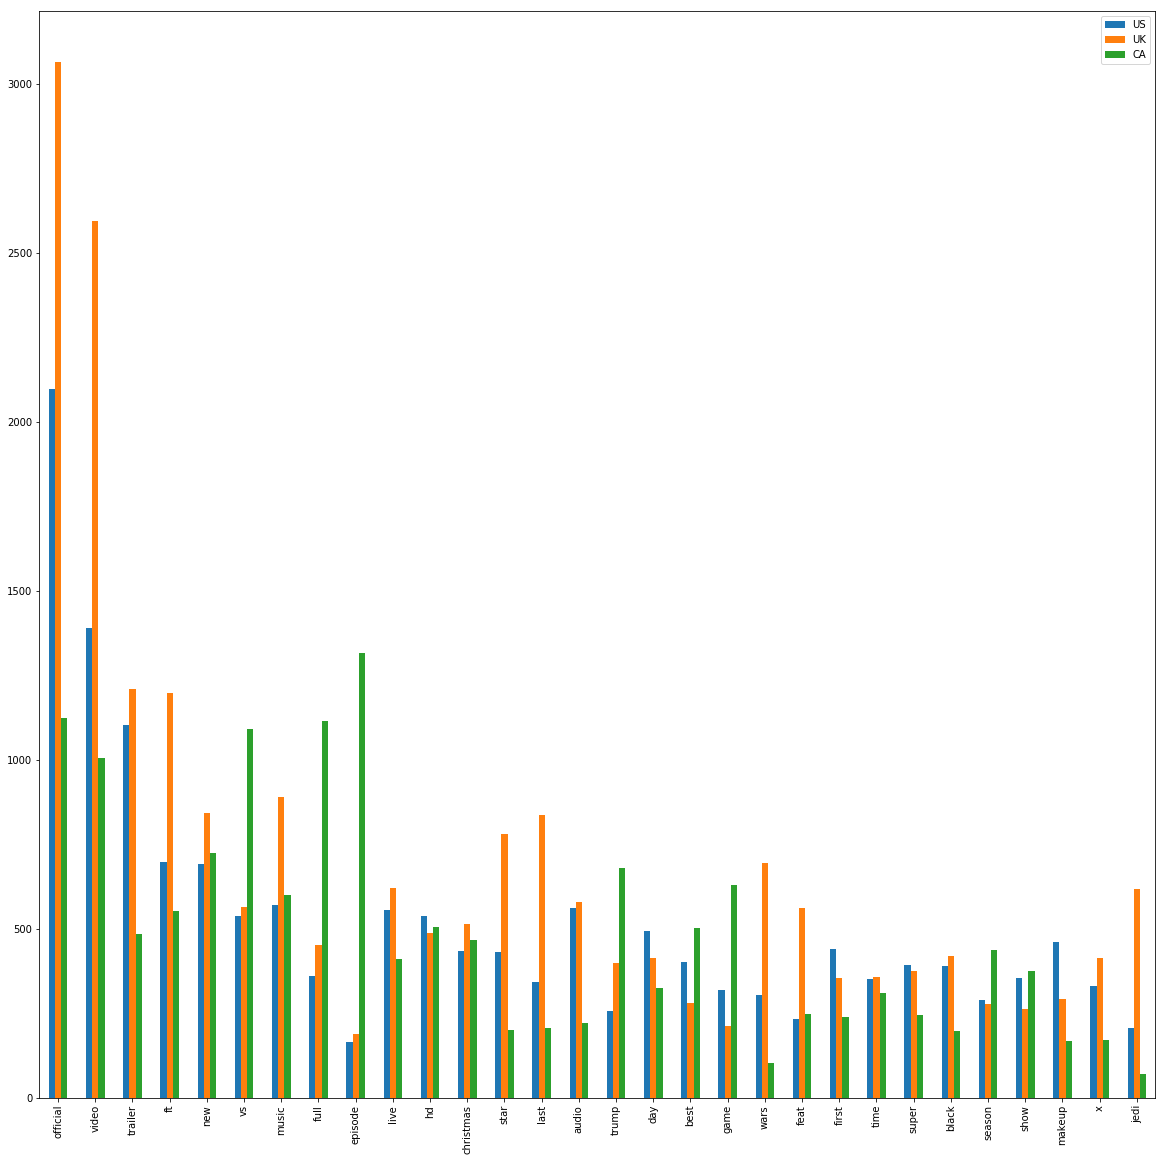

In [86]:
def stripTitles(titles,country):
    result= []
    stop = stopwords.words("english")
    for x in titles:
        temp = re.sub(r"[!.\(\)\[\],\´\';\'\-:\'\"\|\/\*\?\&]", "", str(x).lower())
        temp = re.sub(r" {2,}", " ", temp)
        
        for y in temp.split(" "):
            if y not in stop and re.fullmatch(r"\D+",y):
                result.append(y)
    resultDict=Counter(result)            
    words = pd.DataFrame.from_dict(resultDict,orient='index')
    words.columns=[country]
    return words
US=stripTitles(trending.title.values,"US")
CA=stripTitles(trending_CA.title.values,"CA")
UK=stripTitles(trending_UK.title.values,"UK")
US= US.join(CA).join(UK)
US["total"]=US.UK+US.US+US.CA
US.sort_values("total",ascending=False)[["US","UK","CA"]][:30].plot(kind="bar",figsize=(20,20))